# Importing Libraries

In [63]:
# import pandas for dataframe
import pandas as pd
# import numpy for transformations
import numpy as np
# visulization librarie
import matplotlib.pyplot as plt
import seaborn as sns
# import re for text cleaning
import re

# Data Analysis

## 1. Data Gathering

In [64]:
df1 = pd.read_csv('../data/Coursera.csv')  # Go one level up and access data.csv
df1.head()  # Display first few rows

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [65]:
# Make a copy of the data
df = df1.copy()

In [66]:
# Check Shape of the data
df.shape

(3522, 7)

In [67]:
df.info()  # Check for columns datatype and more about the size of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [68]:
# show the columns name
df.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [69]:
# Check for missing values
df.isna().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

**Conclusion**

- In the data there are total 7 columns
- And there is no missing data 

## 2. Data Cleaning

In [70]:
# Check for the Duplicates rows
df.duplicated().sum()

98

In [71]:
df[df.duplicated()].sample(10)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
1790,Data Visualization with Python,IBM,Beginner,4.4,https://www.coursera.org/learn/python-for-data...,"""A picture is worth a thousand words"". We are ...",Chart Python Programming Choropleth Map ana...
1385,Front-End Web UI Frameworks and Tools: Bootstr...,The Hong Kong University of Science and Techno...,Intermediate,4.7,https://www.coursera.org/learn/bootstrap-4,This course will give you an overview of clien...,less (stylesheet language) jquery language ...
3499,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
2655,The Technology of Music Production,Berklee College of Music,Intermediate,4.7,https://www.coursera.org/learn/technology-of-m...,Learn about the music production process�inclu...,Audio Production sound guitar electronic mu...
1379,Databases and SQL for Data Science,IBM,Conversant,4.6,https://www.coursera.org/learn/sql-data-science,Much of the world's data resides in databases....,Computer Programming Python Programming Data...
2037,Asymmetric Cryptography and Key Management,University of Colorado System,Advanced,4.6,https://www.coursera.org/learn/asymmetric-crypto,Welcome to Asymmetric Cryptography and Key Man...,public key certificate key exchange public-k...
2519,Python for Data Science and AI,IBM,Conversant,4.5,https://www.coursera.org/learn/python-for-appl...,Kickstart your learning of Python for data sci...,Python Programming python libraries analysis...
2720,Pro Tools Basics,Berklee College of Music,Intermediate,4.6,https://www.coursera.org/learn/protools,Producing music is an incredibly creative proc...,Audio Engineering human voice saving Sound ...
2747,What is Data Science?,IBM,Conversant,4.6,https://www.coursera.org/learn/what-is-datasci...,The art of uncovering the insights and trends ...,analysis Machine Learning Data Mining Artif...
3469,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...


In [72]:
# Drop the duplicate rows from the data
df.drop_duplicates(keep='first', inplace=True)

In [73]:
# Shape of the data
df.shape

(3424, 7)

In [74]:
# Function to remove extra space from text
def remove_space(text):
    if isinstance(text,str):
        text = text.strip().lower()
        return text
    return text

In [75]:
# now apply the remove_space function to the all the text columns 
df['Course Name'] = df['Course Name'].apply(remove_space)
df['Course Rating'] = df['Course Rating'].apply(remove_space)
df['University'] = df['University'].apply(remove_space)
df['Difficulty Level'] = df['Difficulty Level'].apply(remove_space)
df['Course URL'] = df['Course URL'].apply(remove_space)
df['Course Description'] = df['Course Description'].apply(remove_space)
df['Skills'] = df['Skills'].apply(remove_space)

In [76]:
# check random 10 rows
df.sample(10)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
3054,kinematics: describing the motions of spacecraft,university of colorado boulder,advanced,4.9,https://www.coursera.org/learn/spacecraft-dyna...,the movement of bodies in space (like spacecra...,fluid mechanics framing angular computation...
2306,big history - from the big bang until today,university of amsterdam,beginner,4.6,https://www.coursera.org/learn/bighistory,welcome to this big history course! in this co...,nanorobotics physics history solar systems ...
477,images and links in html,coursera project network,beginner,4.7,https://www.coursera.org/learn/images-and-link...,"in this project, you will write the html code ...",i-deas web page computer graphics html web...
2801,sensor manufacturing and process control,university of colorado boulder,intermediate,4.5,https://www.coursera.org/learn/sensor-manufact...,"""sensor manufacturing and process control"" can...",mechatronics accuracy and precision manufact...
1704,machine translation,karlsruhe institute for technology,advanced,5,https://www.coursera.org/learn/machinetranslation,welcome to the clics-machine translation mooc ...,machine translation artificial neural network...
3473,noun clauses and conditionals,"university of california, irvine",advanced,4.8,https://www.coursera.org/learn/noun-clauses-co...,this is the third course in the learn english:...,language english grammar civil engineering ...
949,planning & design of sanitation systems and te...,�cole polytechnique f�d�rale de lausanne,intermediate,4.7,https://www.coursera.org/learn/sanitation,do you want to learn how to plan affordable an...,hydraulics planning architecture urban plan...
1548,managing project risks and changes,"university of california, irvine",beginner,4.7,https://www.coursera.org/learn/project-risk-ma...,this course will help you manage project risk ...,planning risk management communication lead...
63,privacy in the usa,eit digital,advanced,4.6,https://www.coursera.org/learn/privacy-laws-us,after having followed privacy in the western w...,american law personally identifiable informat...
3241,budgeting essentials and development,funda��o instituto de administra��o,intermediate,4.4,https://www.coursera.org/learn/budgeting-essen...,the budgeting essentials and development cours...,budget development situation analysis projec...


In [77]:
# renaming the columns name
df.rename(columns={'Course Name' : 'Name', 
                   'Course Rating' : 'Rating',
                  'Course URL' : 'URL',
                  'Course Description' : 'Description'},inplace=True)

In [78]:
df.head()

,Name,University,Difficulty Level,Rating,URL,Description,Skills
0,write a feature length screenplay for film or ...,michigan state university,beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in th...,drama comedy peering screenwriting film d...
1,business strategy: business model canvas analy...,coursera project network,beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"by the end of this guided project, you will be...",finance business plan persona (user experien...
2,silicon thin film solar cells,�cole polytechnique,advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,this course consists of a general presentation...,chemistry physics solar energy film lambda...
3,finance for managers,iese business school,intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"when it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,retrieve data using single-table sql queries,coursera project network,beginner,4.6,https://www.coursera.org/learn/single-table-sq...,in this course you�ll learn how to effectively...,data analysis select (sql) database manageme...


In [79]:
# Change the datatype of the rating column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3424 non-null   object 
 1   University        3424 non-null   object 
 2   Difficulty Level  3424 non-null   object 
 3   Rating            3342 non-null   float64
 4   URL               3424 non-null   object 
 5   Description       3424 non-null   object 
 6   Skills            3424 non-null   object 
dtypes: float64(1), object(6)
memory usage: 214.0+ KB


In [81]:
df.sample(6)

,Name,University,Difficulty Level,Rating,URL,Description,Skills
304,startups in open innovation,saint petersburg state university,advanced,4.0,https://www.coursera.org/learn/startups-in-ope...,this course was created in the partnership wit...,open space technology open innovation diffus...
1300,science of exercise,university of colorado boulder,intermediate,4.8,https://www.coursera.org/learn/science-exercise,learners who complete science of exercise will...,disease physical exercise fitness and nutrit...
3174,ash-related operational challenges in energy u...,technical university of denmark (dtu),intermediate,4.9,https://www.coursera.org/learn/sustainability-...,"the basic idea behind this mooc, is to present...",heat transfer design well logging soil sampl...
2563,deep learning inference with azure ml studio,coursera project network,beginner,4.7,https://www.coursera.org/learn/azure-machine-l...,"in this project-based course, you will use the...",web service inference deep learning web app...
2120,evolution: a course for educators,american museum of natural history,beginner,4.7,https://www.coursera.org/learn/teaching-evolution,how are all of the species living on earth tod...,species phylogenetic tree evolutionary biolo...
1068,fundamentals of modern russian-designed npps w...,national research nuclear university mephi,advanced,5.0,https://www.coursera.org/learn/fundamentals-of...,the goal of the course is to present the press...,p versus np problem spent nuclear fuel physi...


In [82]:
# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower().strip()  # Convert to lowercase and remove leading/trailing spaces
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [83]:
df.columns

Index(['Name', 'University', 'Difficulty Level', 'Rating', 'URL',
       'Description', 'Skills'],
      dtype='object')

In [84]:
# Apply the function to relevant text columns
text_columns = ['Name','University','Difficulty Level','Description', 'Skills']

for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Display cleaned data
df.head()

,Name,University,Difficulty Level,Rating,URL,Description,Skills
0,write a feature length screenplay for film or ...,michigan state university,beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film docume...
1,business strategy business model canvas analys...,coursera project network,beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,by the end of this guided project you will be ...,finance business plan persona user experience ...
2,silicon thin film solar cells,cole polytechnique,advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,this course consists of a general presentation...,chemistry physics solar energy film lambda cal...
3,finance for managers,iese business school,intermediate,4.8,https://www.coursera.org/learn/operational-fin...,when it comes to numbers there is always more ...,accounts receivable dupont analysis analysis a...
4,retrieve data using singletable sql queries,coursera project network,beginner,4.6,https://www.coursera.org/learn/single-table-sq...,in this course youll learn how to effectively ...,data analysis select sql database management s...


## 3. Exploratory Data Analysis

#### Word cloud with most frequent skills

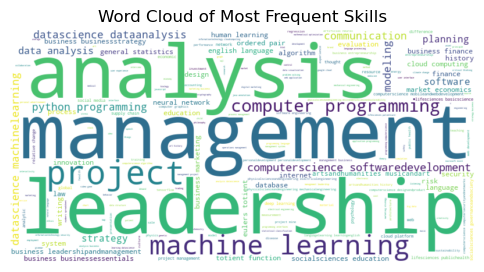

In [85]:
from wordcloud import WordCloud

# Combine all skills into a single string
all_skills = ' '.join(df['Skills'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Skills")
plt.show()

**CONCLUSION**

- Most skills words are : Analysis, management, Leadership, Project, Machine learning, COmputer science, Programming and more.

#### Top 10 Universities Offering Courses

In [86]:
df['University'].value_counts().nlargest(10)

University
coursera project network                     562
university of illinois at urbanachampaign    138
university of michigan                       101
johns hopkins university                     101
university of colorado boulder               101
university of california irvine               83
university of colorado system                 81
university of california san diego            79
google cloud                                  70
ibm                                           54
Name: count, dtype: int64

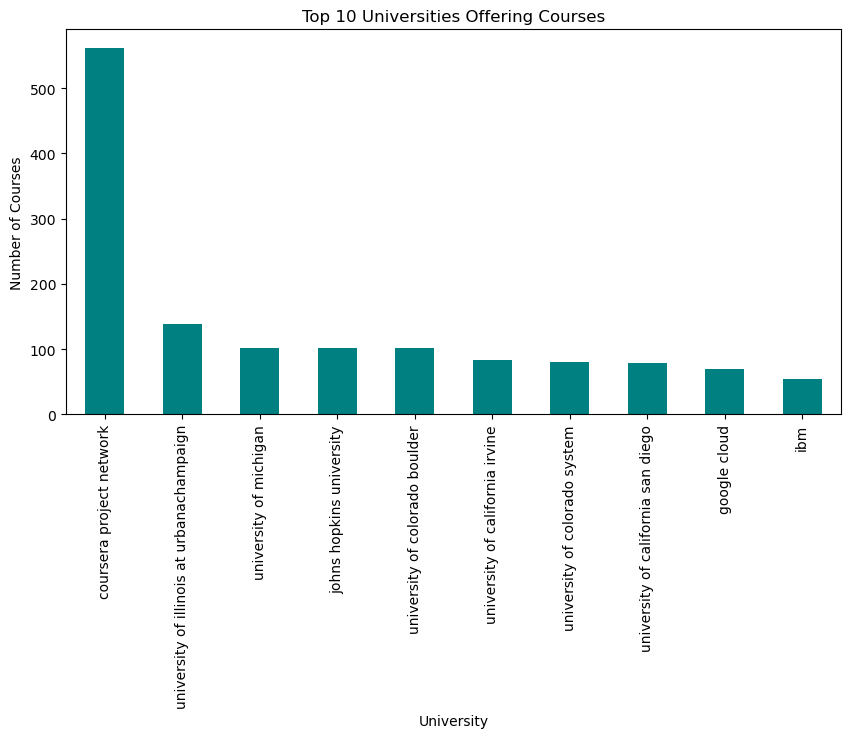

In [87]:
plt.figure(figsize=(10, 5))
df['University'].value_counts().nlargest(10).plot(kind='bar', color='teal')
plt.title('Top 10 Universities Offering Courses')
plt.xlabel('University')
plt.ylabel('Number of Courses')
plt.xticks(rotation=90)
plt.show()

#### Distribution of Rating

In [88]:
df['Rating'].describe()


count    3342.000000
mean        4.552244
std         0.340633
min         1.000000
25%         4.500000
50%         4.600000
75%         4.800000
max         5.000000
Name: Rating, dtype: float64

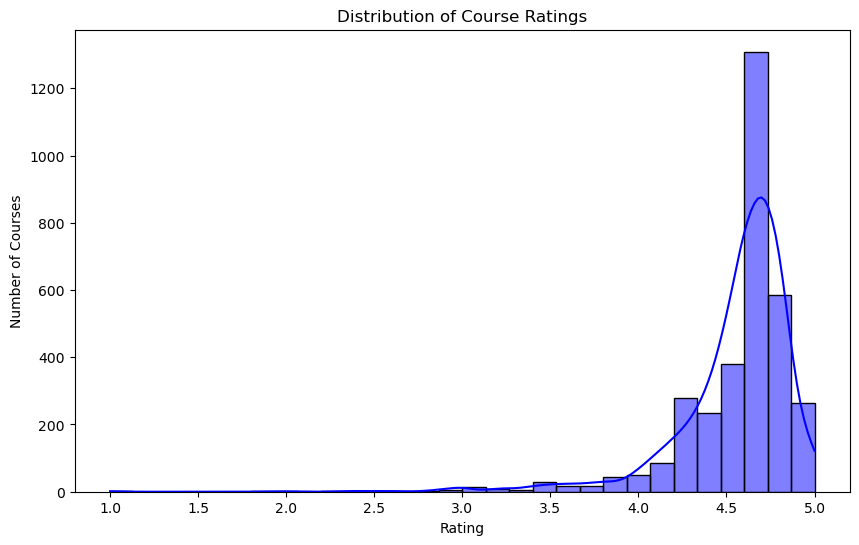

In [89]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Courses")
plt.show()

**CONCLUSION**

- Highly left skewed data of rating
- Most of the data lies in between rating 4.2 to 5

#### Difficulty Level Distribution

C:\Users\praye\AppData\Local\Temp\ipykernel_13444\1734729131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Difficulty Level'], palette='coolwarm')


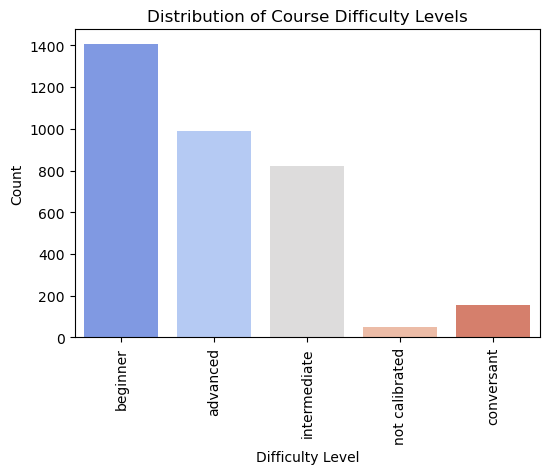

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Difficulty Level'], palette='coolwarm')
plt.title('Distribution of Course Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the xlabels
plt.show()

In [91]:
df.columns

Index(['Name', 'University', 'Difficulty Level', 'Rating', 'URL',
       'Description', 'Skills'],
      dtype='object')

#### Analysis on University and Difficulty Level

In [92]:
# Find the top 5 universities offering the most courses
top_5_universities = df['University'].value_counts().nlargest(5).index

# Filter the dataset for these top 5 universities
df_top5 = df[df['University'].isin(top_5_universities)]

# Display the count of courses for each university
df_top5[['University']].value_counts()


University                               
coursera project network                     562
university of illinois at urbanachampaign    138
johns hopkins university                     101
university of colorado boulder               101
university of michigan                       101
Name: count, dtype: int64

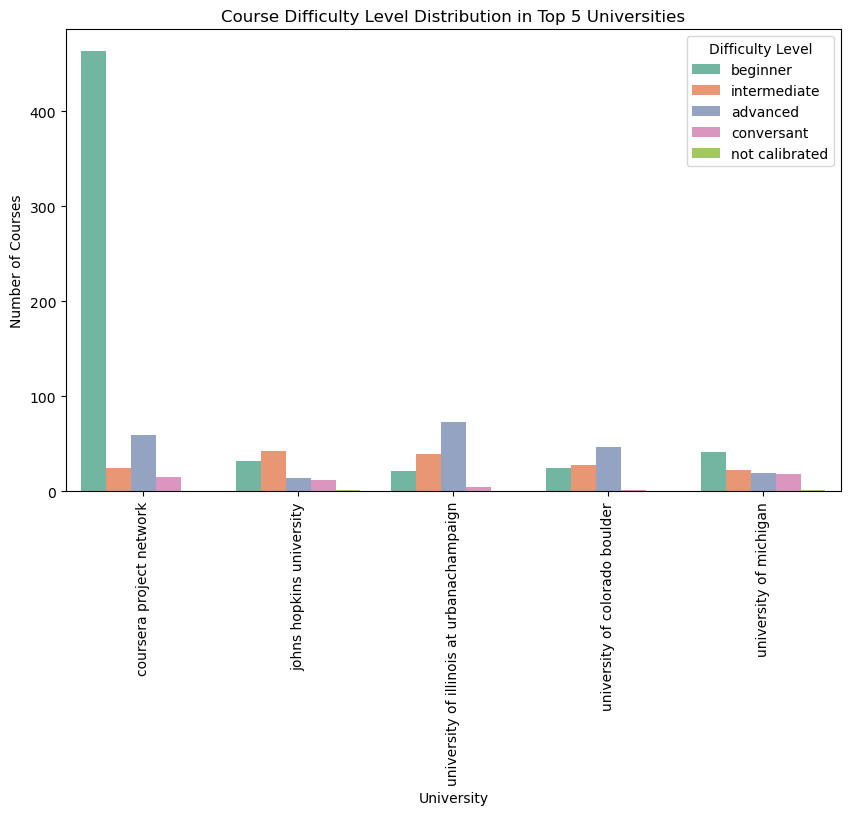

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top5, x='University', hue='Difficulty Level', palette='Set2')
plt.title("Course Difficulty Level Distribution in Top 5 Universities")
plt.xlabel("University")
plt.ylabel("Number of Courses")
plt.xticks(rotation=90)
plt.legend(title="Difficulty Level")
plt.show()


In [94]:
# Get percentage distribution of difficulty levels for top 5 universities
difficulty_distribution = df_top5.groupby('University')['Difficulty Level'].value_counts(normalize=True).unstack() * 100

# Display the percentage table
difficulty_distribution


Difficulty Level,advanced,beginner,conversant,intermediate,not calibrated
University,,,,,
coursera project network,10.498221,82.384342,2.669039,4.448399,NaN
johns hopkins university,13.861386,31.683168,11.881188,41.584158,0.990099
university of colorado boulder,46.534653,24.752475,0.990099,27.722772,NaN
university of illinois at urbanachampaign,52.898551,15.217391,3.623188,28.260870,NaN
university of michigan,18.811881,40.594059,17.821782,21.782178,0.990099


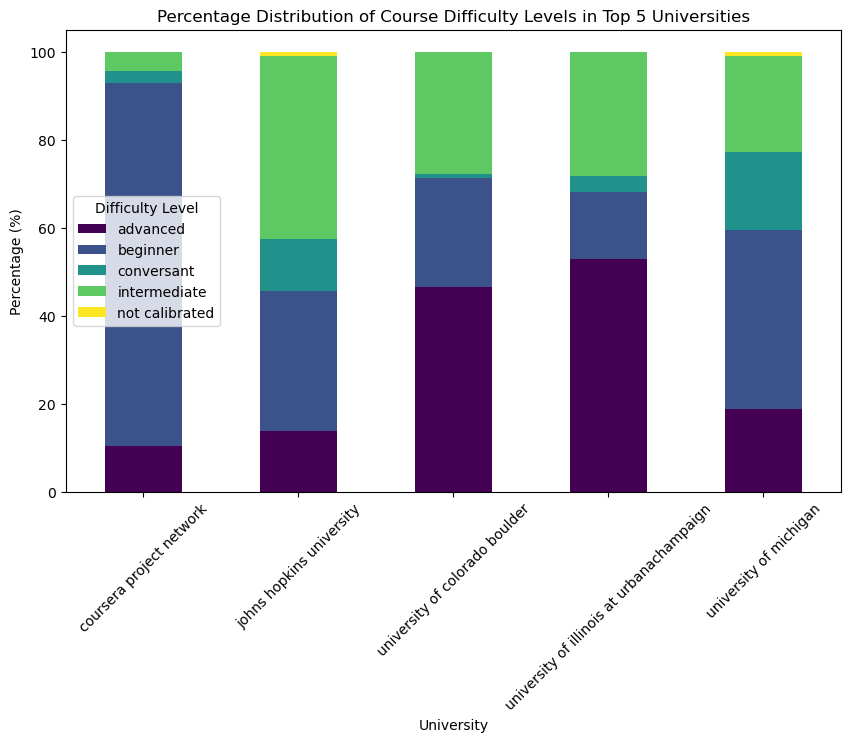

In [95]:
difficulty_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Percentage Distribution of Course Difficulty Levels in Top 5 Universities")
plt.xlabel("University")
plt.ylabel("Percentage (%)")
plt.legend(title="Difficulty Level")
plt.xticks(rotation=45)
plt.show()


In [96]:
# show the all columns
df.columns

Index(['Name', 'University', 'Difficulty Level', 'Rating', 'URL',
       'Description', 'Skills'],
      dtype='object')

#### Word Cloud on Description

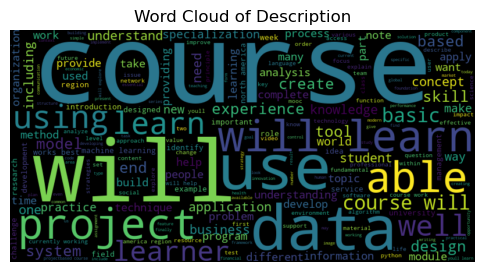

In [97]:
from wordcloud import WordCloud

# Combine all skills into a single string
desc = ' '.join(df['Description'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(desc)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Description")
plt.show()

In [98]:
df.columns

Index(['Name', 'University', 'Difficulty Level', 'Rating', 'URL',
       'Description', 'Skills'],
      dtype='object')

#### Analysis on Skills and Rating

In [99]:
# Explode skills into separate rows
df_exploded = df.assign(Skill=df['Skills'].str.split(',')).explode('Skill')
df_exploded['Skill'] = df_exploded['Skill'].str.strip()  # Remove extra spaces

# Compute average rating for each skill
skill_ratings = df_exploded.groupby('Skill')['Rating'].mean().reset_index()

# Sort by highest rated skills
skill_ratings = skill_ratings.sort_values(by='Rating', ascending=False)

# Display top 10 skills with highest ratings
skill_ratings.head(10)



,Skill,Rating
3019,spreadsheet project benefits present value wor...,5.0
903,digital signal processing image processing mod...,5.0
2859,saving project probability density function pr...,5.0
684,convolution artificial neural networks project...,5.0
1265,frequency capping budget schedule webcams mark...,5.0
681,continuous function proc compiler data depende...,5.0
2851,sample size determination prognostics external...,5.0
2849,salesforce sales empathy exhibitions audience ...,5.0
102,analysis latex piano happiness music prior pro...,5.0
392,business analytics it operations analytics ord...,5.0


#### Analysis on University and Rating of Courses

In [100]:
# Compute average, min, max, and median ratings per university
rating_summary = df_top5.groupby('University')['Rating'].agg(['count', 'mean', 'min', 'max', 'median']).sort_values(by='mean', ascending=False)

# Display rating summary
rating_summary


,count,mean,min,max,median
University,,,,,
university of michigan,101,4.642574,3.4,5.0,4.7
coursera project network,523,4.551625,3.0,5.0,4.6
johns hopkins university,98,4.537755,2.4,4.9,4.7
university of illinois at urbanachampaign,136,4.535294,2.8,4.9,4.7
university of colorado boulder,94,4.469149,1.0,5.0,4.6


C:\Users\praye\AppData\Local\Temp\ipykernel_13444\519120887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='University', y='Rating', palette='coolwarm')


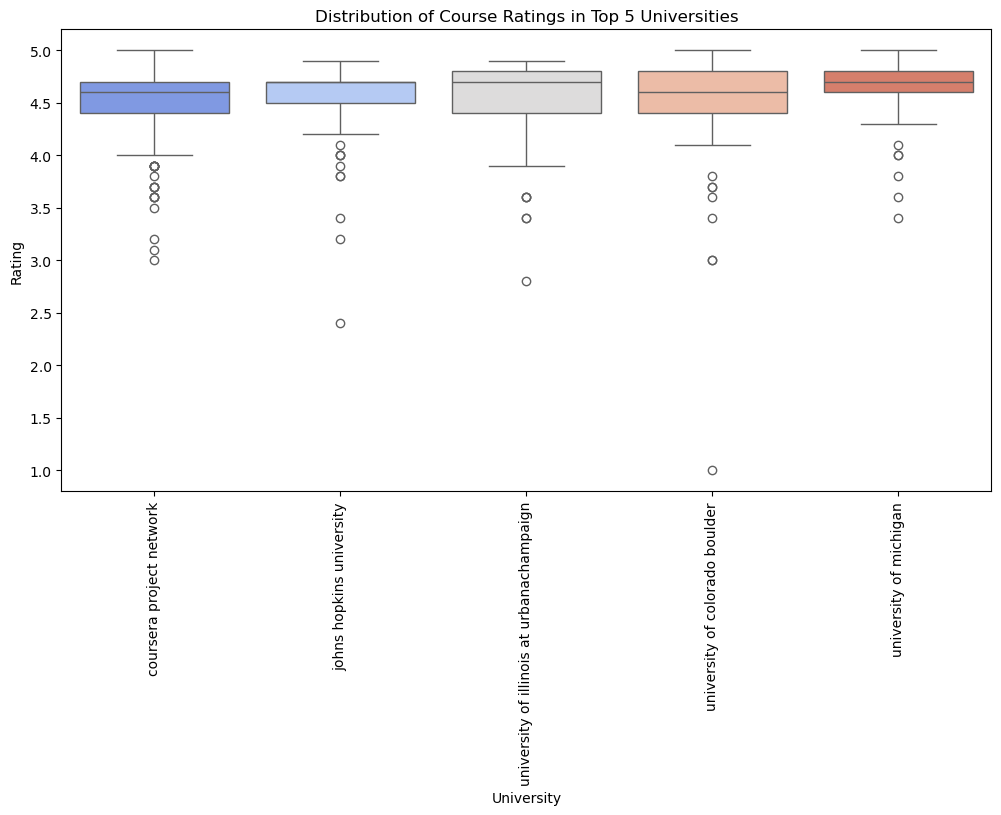

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='University', y='Rating', palette='coolwarm')
plt.title("Distribution of Course Ratings in Top 5 Universities")
plt.xlabel("University")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

C:\Users\praye\AppData\Local\Temp\ipykernel_13444\4069015704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_summary.reset_index(), x='University', y='mean',palette='viridis')


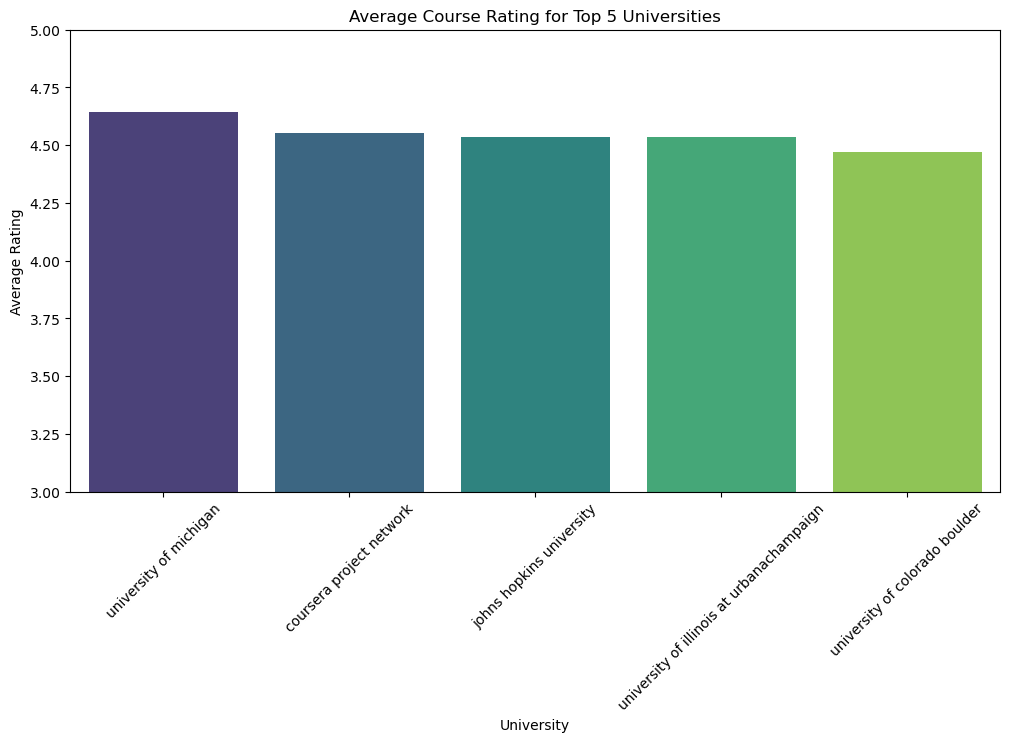

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_summary.reset_index(), x='University', y='mean',palette='viridis')
plt.title("Average Course Rating for Top 5 Universities")
plt.xlabel("University")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.ylim(3, 5)  # Focus on rating range
plt.show()


**CONCLUSION**

- University of michigan is high rated and most courses offering university for students
- Coursera offering more beginner level courses with high rating

In [103]:
df.columns

Index(['Name', 'University', 'Difficulty Level', 'Rating', 'URL',
       'Description', 'Skills'],
      dtype='object')

# Recommendation System

## Based on Skills

### S.1 Feature Engineering on Skills

In [104]:
df.Skills = df.Skills.str.replace(',',' ')

In [105]:
# Remove unnecessary symbols and punctuations from the 'Skills' column
import re
df['Skills'] = df['Skills'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### Vectorization of Skills
We use TF-IDF (Term Frequency-Inverse Document Frequency) or CountVectorizer to convert the skills into a numerical format that can be used in the recommendation system.

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the skills column into a TF-IDF matrix
skills_matrix = tfidf_vectorizer.fit_transform(df['Skills'])

# View the shape of the TF-IDF matrix (no. of courses, no. of unique skills)
print(skills_matrix.shape)


(3424, 4495)


#### Calculate Similarity Between Courses

We use cosine similarity to measure the similarity between courses based on their skills. Cosine similarity computes the cosine of the angle between two vectors, indicating their similarity.

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim_skills = cosine_similarity(skills_matrix, skills_matrix)

# Check the similarity between the first course and the rest
print(cosine_sim_skills[0])


[1.        0.        0.0594052 ... 0.        0.        0.       ]


In [108]:
df.Name.iloc[151]

'marketing analytics capstone project'

### Recommendation Pipeline

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [110]:
# Step 1: Preprocessing the user input skills
def preprocess_user_skills(user_skills):
    # Ensure the input is a string
    return " ".join(user_skills) if isinstance(user_skills, set) else user_skills

# Step 2: Vectorize skills using TF-IDF
def vectorize_skills(df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    skills_matrix = tfidf_vectorizer.fit_transform(df['Skills'])
    return tfidf_vectorizer, skills_matrix

# Step 3: Calculate cosine similarity between user skills and course skills
def calculate_cosine_similarity(user_skills_vector, skills_matrix):
    return cosine_similarity(user_skills_vector, skills_matrix)

# Step 4: Filter and rank courses based on similarity and rating
def filter_and_rank_courses(df, sim_scores, rating_threshold=4, top_n=5):
    # Sort the courses based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:top_n]  # Get top N similar courses

    # Extract course indices
    course_indices = [i[0] for i in sim_scores]
    
    # Get the courses corresponding to the indices
    recommended_courses = df.iloc[course_indices]
    
    # Apply rating threshold (filter courses with ratings below the threshold)
    recommended_courses = recommended_courses[recommended_courses['Rating'] >= rating_threshold]
    
    # Sort by rating (descending)
    recommended_courses = recommended_courses.sort_values(by='Rating', ascending=False)
    
    return recommended_courses[['Name', 'Rating', 'Skills']]

# Step 5: Combine all steps into a pipeline
def recommend_courses_pipeline(user_skills, df, top_n=5, rating_threshold=4):
    try:
        # Preprocess the user input skills
        user_skills = preprocess_user_skills(user_skills)

        # Vectorize skills and calculate similarity
        tfidf_vectorizer, skills_matrix = vectorize_skills(df)
        user_skills_vector = tfidf_vectorizer.transform([user_skills])  # Convert user skills to vector
        cosine_sim = calculate_cosine_similarity(user_skills_vector, skills_matrix)

        # Get the top N recommended courses based on skills similarity and rating
        recommended_courses = filter_and_rank_courses(df, list(enumerate(cosine_sim[0])), rating_threshold, top_n)
        
        return recommended_courses
    
    except Exception as e:
        return f"An error occurred: {str(e)}"


In [111]:
# Example: Input set of skills (from user)
user_skills = "machine learning, deep learning"

# Assume `df` is your DataFrame containing course details
recommended_courses = recommend_courses_pipeline(user_skills=user_skills, df=df, top_n=5, rating_threshold=4)

recommended_courses


,Name,Rating,Skills
615,structuring machine learning projects,4.8,bias human learning analysis computer multitas...
2538,introduction to applied machine learning,4.7,algorithms machine learning algorithms applied...
3230,machine learning for all,4.7,robotics machine learning artificial neural ne...
2190,applied machine learning in python,4.5,python programming algorithms computer program...
440,getting started with aws machine learning,4.4,natural language processing machine learning h...


In [112]:
tfidf_vectorizer_skills = TfidfVectorizer(stop_words='english')
skills_matrix = tfidf_vectorizer.fit_transform(df['Skills'])

### Exporting the vectorizer and dataset

In [113]:
import pickle

In [114]:
# exporting the cleaned dataset
df.to_csv("../data/Coursera_cleaned.csv")

In [115]:
# Save TF-IDF vectorizer
with open("../models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer_skills, f)

# Save skills matrix
with open("../models/skills_matrix.pkl", "wb") as f:
    pickle.dump(skills_matrix, f)

print("TF-IDF vectorizer and skills matrix saved successfully!")


TF-IDF vectorizer and skills matrix saved successfully!


In [116]:
df.columns

Index(['Name', 'University', 'Difficulty Level', 'Rating', 'URL',
       'Description', 'Skills'],
      dtype='object')

In [143]:
df.Skills.sample(1).values

array(['analytics data analysis physics exploratory data analysis business analytics python programming quality control data science sql business analysis datascience dataanalysis'],
      dtype=object)

In [122]:
df1.Skills.sample(1).values

array(['crime  fingerprints  proposition  dna profiling  law  forensics  dnas  speech  forensic science  crime scene social-sciences law'],
      dtype=object)